<a href="https://colab.research.google.com/github/pierandreamorelli/stage/blob/main/cs_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scaletta
# Pipeline 1 - Data Preparation
1.   Caricare DF: PY, PPY
2.   Concatenare AN con PY, PPY
3.   Eliminare colonne duplicate (Pandas)
4.   Identificare colonne che hanno un solo valore e dropparle
5. Identificare colonne categoriche
6. Fare encoding one-hot per colonne categoriche
7. Identificare colonne numeriche
8. Fare re-scaling e normalizzare colonne numeriche
9. Gestire valori NaN

# Pipeline 2 - Training
1.   Identificare la Y (colonna target, presa da df_LY) 
2.   Opzionale: passare anche la Y nella data preparation 
3. Attaccare Y a df_res 
4. split train e test (80%, 20%)
5. identificare due/quattro modelli 
6. identificare le metriche di valutazione
7. effettuare il training dei modelli
8. valutarne le performance 



# Pipeline 1 - Data Preparation

1. **Upload DataFrame**

In [2]:
import pandas as pd

df_AN = pd.read_csv('/content/drive/MyDrive/dataset/cs_search.csv')
df_LY = pd.read_csv('/content/drive/MyDrive/dataset/cs_fs_lastyear.csv')
df_PY = pd.read_csv('/content/drive/MyDrive/dataset/cs_fs_prevyear.csv')
df_PPY = pd.read_csv('/content/drive/MyDrive/dataset/cs_fs_prevprevyear.csv')



In [ ]:
df_AN.set_index('id')

In [ ]:
df_LY.set_index('companyId')

In [ ]:
df_PY.set_index('companyId')

In [ ]:
df_PPY.set_index('companyId')

2. **Concat DataFrame Financial - Anagraphic**

In [7]:
df_res_LY = df_AN.join(df_LY, lsuffix='_AN', rsuffix='_LY')

In [8]:
df_res_PY = df_AN.join(df_PY, lsuffix='_AN', rsuffix='_PY')

In [9]:
df_res_PPY = df_AN.join(df_PPY, lsuffix='_AN', rsuffix='_PPY')

3. **Duplicates Drop**

In [10]:
df_res_LY = df_res_LY.loc[:,~df_res_LY.columns.duplicated()].copy()

In [11]:
df_res_PY = df_res_PY.loc[:,~df_res_PY.columns.duplicated()].copy()

In [12]:
df_res_PPY = df_res_PPY.loc[:,~df_res_PPY.columns.duplicated()].copy()

4. **Unique values drop**

In [13]:
nunique = df_res_LY.nunique()
cols_to_drop = nunique[nunique == 1].index
df_res_LY = df_res_LY.drop(cols_to_drop, axis=1)

In [14]:
nunique = df_res_PY.nunique()
cols_to_drop = nunique[nunique == 1].index
df_res_PY = df_res_PY.drop(cols_to_drop, axis=1)

In [15]:
nunique = df_res_PPY.nunique()
cols_to_drop = nunique[nunique == 1].index
df_res_PPY = df_res_PPY.drop(cols_to_drop, axis=1)

5. **Categorical Columns Identification**

In [16]:
cols = df_res_LY.columns
num_cols = df_res_LY._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))
cat_cols

['regNo',
 'vatNo',
 'officeType',
 'address.simpleValue',
 'phoneNumbers',
 'safeNo',
 'address.houseNo',
 'type_AN',
 'status',
 'companyId',
 'yearEndDate',
 'name',
 'id',
 'dateOfLatestChange',
 'address.city',
 'address.street',
 'dateOfLatestAccounts',
 'address.province']

6. **Numeric Columns Identification**

In [17]:
num_cols = df_res_LY._get_numeric_data()

7. **Encoding One Hot Categorical Columns**

In [18]:
#df with only categorical features
cat_df = pd.DataFrame()
for i in cat_cols:
  cat_df[i] = df_res_PY[i]

In [ ]:
#one hot office type
onehot_OT_PY = pd.get_dummies(cat_df['officeType'])

In [ ]:
#one hot province
onehot_PR_PY = pd.get_dummies(cat_df['address.province'])

8. **Scaling and Normalization num_cols**

In [21]:
#df_LY with only numerical features
num_df_LY = df_res_LY
for i in cat_cols:
  num_df_LY = num_df_LY.drop([i], axis = 1)

In [ ]:
num_df_LY.head()

In [23]:
from sklearn import preprocessing

x = num_df_LY.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

norm_df_LY = pd.DataFrame(x_scaled)
norm_df_LY.head()

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,0.000000,0.0,0.123744,0.001153,0.000031,0.000004,0.398320,0.000135,0.000008,0.000030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.002217,0.0,0.006638,0.001061,1.000000,1.000000,0.926943,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.004435,0.0,0.006638,0.001612,0.790343,0.788019,0.883798,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.003672,1.000000,NaN,0.363821,NaN,0.001954
3,0.006652,0.0,0.006638,0.001102,0.464807,0.486858,0.000000,0.096791,0.046636,0.012434,...,0.054611,0.008877,0.279806,0.0,0.246172,0.950714,0.546138,0.892027,NaN,0.008152
4,0.008869,0.0,0.006586,0.001561,0.212968,0.211021,0.567104,0.063790,0.025846,0.023797,...,NaN,0.003740,0.039849,NaN,0.000701,NaN,1.000000,1.000000,NaN,0.019967


In [24]:
num_df_PY = df_res_PY
for i in cat_cols:
  num_df_PY = num_df_PY.drop([i], axis = 1)

In [25]:
x = num_df_PY.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

norm_df_PY = pd.DataFrame(x_scaled)
norm_df_PY.head()

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,0.000000,0.0,0.123744,0.001153,0.0,0.000019,0.000019,0.230992,0.000230,0.000027,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.002217,0.0,0.006638,0.001061,0.0,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.003577,0.000000,0.000000,0.0,0.005354,1.000000,0.000000,0.651522,0.0,0.003648
2,0.004435,0.0,0.006638,0.001612,0.0,0.812360,0.823238,0.169566,NaN,NaN,...,NaN,NaN,NaN,NaN,0.002913,0.788708,NaN,0.513861,NaN,0.003564
3,0.006652,0.0,0.006638,0.001102,0.0,0.397336,0.400181,0.357097,0.101165,0.047178,...,0.113756,0.010726,0.326106,0.0,0.249981,0.379002,0.926096,1.000000,NaN,0.014127
4,0.008869,0.0,0.006586,0.001561,0.0,0.100532,0.098797,0.417713,0.059295,0.025842,...,NaN,0.004581,0.048226,NaN,0.000144,NaN,1.000000,0.813168,NaN,0.045393


In [26]:
num_df_PPY = df_res_PPY
for i in cat_cols:
  num_df_PPY = num_df_PPY.drop([i], axis = 1)

In [27]:
x = num_df_PPY.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

norm_df_PPY = pd.DataFrame(x_scaled)
norm_df_PPY.head()

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,0.000000,0.0,0.123744,0.001153,0.000025,0.000026,0.417278,0.000237,0.000032,0.000192,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.002217,0.0,0.006638,0.001061,1.000000,1.000000,0.509461,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.005376,1.000000,0.000000,1.000000,0.0,0.000007
2,0.004435,0.0,0.006638,0.001612,0.551461,0.554515,0.291751,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.003387,0.451223,NaN,0.451223,NaN,0.000006
3,0.006652,0.0,0.006638,0.001102,0.424274,0.432176,0.000000,0.236481,0.066108,0.227224,...,0.189612,0.015664,0.404025,0.0,0.250840,0.223229,0.873404,0.724152,NaN,0.000013
4,0.008869,0.0,0.006586,0.001561,0.087964,0.085713,0.555392,0.063345,0.028884,0.024958,...,NaN,0.005601,0.063714,NaN,0.000145,NaN,1.000000,0.573530,NaN,0.000048


# Pipeline 2 - Training

1. **Target = 'profitAndLoss.revenue'**

2. **PCA**

In [28]:
import numpy as np
from sklearn.decomposition import PCA

#Replace NaN with 0
#norm_PY = np.nan_to_num(norm_df_PY)
#norm_PY = pd.DataFrame(norm_PY)

#Replace NaN with mean of column
for col in norm_df_PY:
  norm_df_PY[col].fillna(value=norm_df_PY[col].mean(), inplace=True)
norm_df_PY.head()

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,0.000000,0.0,0.123744,0.001153,0.0,0.000019,0.000019,0.230992,0.000230,0.000027,...,0.053901,0.014890,0.029523,0.010653,0.011608,0.034810,0.067782,0.062026,0.08456,0.039878
1,0.002217,0.0,0.006638,0.001061,0.0,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.003577,0.000000,0.000000,0.000000,0.005354,1.000000,0.000000,0.651522,0.00000,0.003648
2,0.004435,0.0,0.006638,0.001612,0.0,0.812360,0.823238,0.169566,0.043089,0.018758,...,0.053901,0.014890,0.029523,0.010653,0.002913,0.788708,0.067782,0.513861,0.08456,0.003564
3,0.006652,0.0,0.006638,0.001102,0.0,0.397336,0.400181,0.357097,0.101165,0.047178,...,0.113756,0.010726,0.326106,0.000000,0.249981,0.379002,0.926096,1.000000,0.08456,0.014127
4,0.008869,0.0,0.006586,0.001561,0.0,0.100532,0.098797,0.417713,0.059295,0.025842,...,0.053901,0.004581,0.048226,0.010653,0.000144,0.034810,1.000000,0.813168,0.08456,0.045393


In [29]:
pca = PCA(n_components=2)
pca_PY = pca.fit_transform(norm_df_PY)
pca_DF_PY = pd.DataFrame(data = pca_PY
             , columns = ['PC1', 'PC2'])

In [30]:
#pca_DF_LY.plot.scatter(x='PC1', y='PC2')

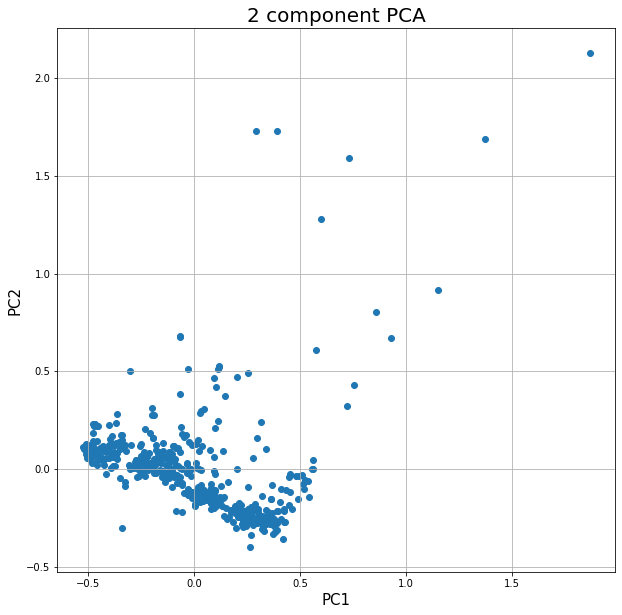

In [31]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15) 
ax.set_title('2 component PCA', fontsize = 20)

ax.scatter(pca_DF_PY['PC1'], pca_DF_PY['PC2'])
ax.grid()

In [32]:
pca.explained_variance_ratio_

array([0.17962711, 0.13464631])

3. **PCA: 50, 80, 95% of Variance**

In [57]:
pca1 = PCA(n_components=0.50)
pca1.fit(norm_df_PY)
columns = ['PC_%i' % i for i in range(5)]
df_pca_PY_50  = pd.DataFrame(pca1.transform(norm_df_PY), columns=columns, index=norm_df_PY.index)
df_pca_PY_50['Y'] = norm_df_LY[4]

df_pca_PY_50.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


,PC_0,PC_1,PC_2,PC_3,PC_4,Y
0,0.404739,-0.373383,-0.026863,0.112392,-0.076715,0.000031
1,2.035886,2.208113,-0.042185,1.916355,1.955400,1.000000
2,1.257599,0.995430,-0.107756,1.284982,0.810744,0.790343
3,1.452418,1.665781,0.105727,-0.221757,-0.664837,0.464807
4,0.965477,0.659426,-0.000816,0.323140,-0.117887,0.212968


In [34]:
pca2 = PCA(n_components=0.80)
pca2.fit(norm_df_PY)
columns = ['PC_%i' % i for i in range(14)]
df_pca_PY_80  = pd.DataFrame(pca2.transform(norm_df_PY), columns=columns, index=norm_df_PY.index)
df_pca_PY_80['Y'] = norm_df_LY[4]

df_pca_PY_80.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13
0,0.418899,-0.357558,-0.026377,-0.131144,-0.032968,-0.081718,0.016675,0.021471,-0.122402,-0.071553,0.119064,0.000263,0.210534,-0.099310
1,1.869650,2.127615,-0.040043,-0.876978,2.548570,-0.566988,-0.256543,0.145501,0.056671,0.209180,-0.206320,-0.146069,-0.457208,-0.466631
2,1.149890,0.917276,-0.104190,-0.713989,0.997289,-1.313334,0.376520,-0.474709,-0.378628,-0.317488,0.469143,-0.100452,0.029530,0.848072
3,1.371401,1.686675,0.101866,-0.047377,-0.832180,-0.562086,-0.219439,-0.206263,1.139733,0.232412,-0.076587,0.262864,0.407870,0.754608
4,0.929629,0.672620,-0.001942,-0.327270,-0.034383,-0.458778,-0.462150,0.224637,0.277519,0.240813,0.054546,0.172095,0.544167,-0.254267


In [35]:
pca3 = PCA(n_components=0.95)
pca3.fit(norm_df_PY)
columns = ['PC_%i' % i for i in range(29)]
df_pca_PY  = pd.DataFrame(pca3.transform(norm_df_PY), columns=columns, index=norm_df_PY.index)

df_pca_PY.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,...,PC_19,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28
0,0.418899,-0.357558,-0.026377,-0.131144,-0.032968,-0.081718,0.016675,0.021471,-0.122402,-0.071553,...,0.047641,-0.009761,0.103680,-0.025186,0.138025,0.182704,-0.038534,-0.054494,0.119385,-0.212100
1,1.869650,2.127615,-0.040043,-0.876978,2.548570,-0.566988,-0.256543,0.145501,0.056671,0.209180,...,-0.283810,0.158444,0.010711,0.087708,0.019307,-0.057269,0.049066,0.005671,-0.034579,-0.001865
2,1.149890,0.917276,-0.104190,-0.713989,0.997289,-1.313334,0.376520,-0.474709,-0.378628,-0.317488,...,0.447563,-0.125786,-0.107523,-0.107058,0.008559,0.064000,-0.080195,0.039450,0.030147,0.008849
3,1.371401,1.686675,0.101866,-0.047377,-0.832180,-0.562086,-0.219439,-0.206263,1.139733,0.232412,...,-0.169079,0.024377,0.414868,0.090983,-0.080332,-0.061578,-0.282526,-0.234075,0.097197,-0.094922
4,0.929629,0.672620,-0.001942,-0.327270,-0.034383,-0.458778,-0.462150,0.224637,0.277519,0.240813,...,0.126396,-0.288635,-0.060398,-0.393379,-0.045647,0.206796,0.166799,0.083144,-0.038591,0.186554


4. Add Y target column

In [73]:
df_pca_PY['Y'] = norm_df_LY[4]
df_pca_PY.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,...,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,Y
0,0.418899,-0.357558,-0.026377,-0.131144,-0.032968,-0.081718,0.016675,0.021471,-0.122402,-0.071553,...,-0.009761,0.103680,-0.025186,0.138025,0.182704,-0.038534,-0.054494,0.119385,-0.212100,0.000031
1,1.869650,2.127615,-0.040043,-0.876978,2.548570,-0.566988,-0.256543,0.145501,0.056671,0.209180,...,0.158444,0.010711,0.087708,0.019307,-0.057269,0.049066,0.005671,-0.034579,-0.001865,1.000000
2,1.149890,0.917276,-0.104190,-0.713989,0.997289,-1.313334,0.376520,-0.474709,-0.378628,-0.317488,...,-0.125786,-0.107523,-0.107058,0.008559,0.064000,-0.080195,0.039450,0.030147,0.008849,0.790343
3,1.371401,1.686675,0.101866,-0.047377,-0.832180,-0.562086,-0.219439,-0.206263,1.139733,0.232412,...,0.024377,0.414868,0.090983,-0.080332,-0.061578,-0.282526,-0.234075,0.097197,-0.094922,0.464807
4,0.929629,0.672620,-0.001942,-0.327270,-0.034383,-0.458778,-0.462150,0.224637,0.277519,0.240813,...,-0.288635,-0.060398,-0.393379,-0.045647,0.206796,0.166799,0.083144,-0.038591,0.186554,0.212968


In [37]:
#DF with all columns + Y
full_df = norm_df_PY
full_df['Y'] = norm_df_LY[4]
full_df.head()

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,Y
0,0.000000,0.0,0.123744,0.001153,0.0,0.000019,0.000019,0.230992,0.000230,0.000027,...,0.014890,0.029523,0.010653,0.011608,0.034810,0.067782,0.062026,0.08456,0.039878,0.000031
1,0.002217,0.0,0.006638,0.001061,0.0,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.005354,1.000000,0.000000,0.651522,0.00000,0.003648,1.000000
2,0.004435,0.0,0.006638,0.001612,0.0,0.812360,0.823238,0.169566,0.043089,0.018758,...,0.014890,0.029523,0.010653,0.002913,0.788708,0.067782,0.513861,0.08456,0.003564,0.790343
3,0.006652,0.0,0.006638,0.001102,0.0,0.397336,0.400181,0.357097,0.101165,0.047178,...,0.010726,0.326106,0.000000,0.249981,0.379002,0.926096,1.000000,0.08456,0.014127,0.464807
4,0.008869,0.0,0.006586,0.001561,0.0,0.100532,0.098797,0.417713,0.059295,0.025842,...,0.004581,0.048226,0.010653,0.000144,0.034810,1.000000,0.813168,0.08456,0.045393,0.212968


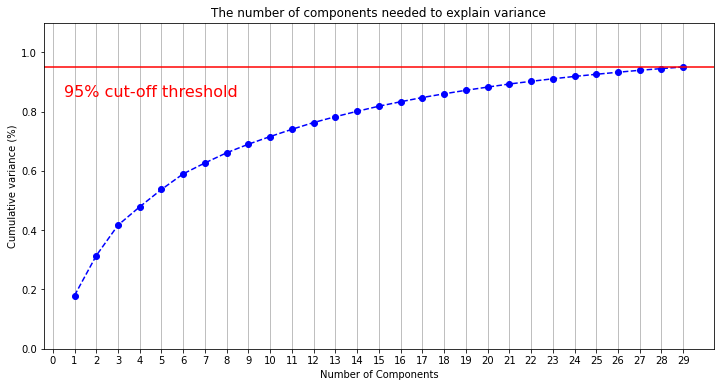

In [38]:
% matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 30, step=1)
y = np.cumsum(pca3.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')

#change from 0-based array index to 1-based human-readable label
plt.xticks(np.arange(0, 30, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

***5. Random split train test***

In [136]:
from sklearn.model_selection import train_test_split
X = df_pca_PY.iloc[:, 0:29]
y = df_pca_PY.iloc[:, 29]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Linear Regression - Benchmark

In [137]:
import numpy as np
from sklearn.linear_model import LinearRegression

lreg = LinearRegression(n_jobs = 2)
lreg.fit(X_train, y_train)
y_pred = lreg.predict(X_test) #predictions on test data
sc = lreg.score(X_test, y_test)

***Linear Regression - Log-Scale Plot***

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


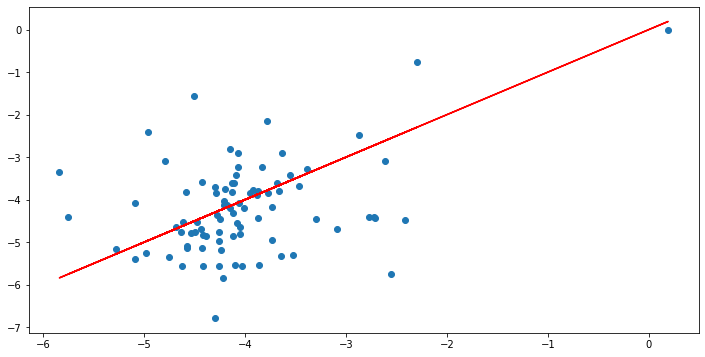

Accuracy: 0.7753439380283527


In [138]:
x = np.log(y_pred)
y = np.log(y_test)

plt.scatter(x, y)
plt.plot(x, x, color='red')
plt.show()
print('Accuracy: ' + str(sc))

#SVM - Regression - SVR

In [141]:
from sklearn.svm import SVR

svr = SVR(gamma='auto', C=1, epsilon=0.01)
svr.fit(X_train, y_train)
y_hat = svr.predict(X_test)
sc2 = svr.score(X_test, y_test)

***SVR - Log-Scale Plot***

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


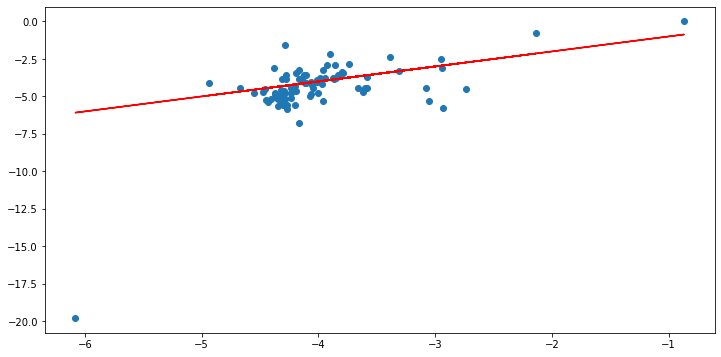

Accuracy: 0.5611320564384086


In [142]:
x = np.log(y_hat)
y = np.log(y_test)

plt.scatter(x, y)
plt.plot(x, x, color='red')
plt.show()
print('Accuracy: ' + str(sc2))

# Multilayer Perceptron - MLP

In [158]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(max_iter=500, activation='relu', solver='lbfgs')
mlp.fit(X_train, y_train)
test_pr = mlp.predict(X_test)
sc3 = mlp.score(X_test, y_test)

In [ ]:
mlp.get_params()

***MLP - Log-Scale Plot***

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


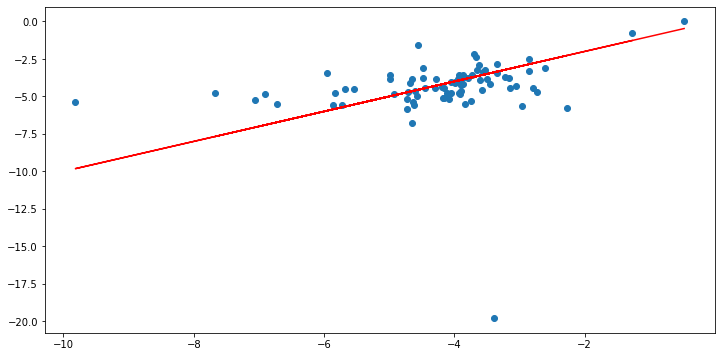

Accuracy: 0.770362716729604


In [160]:
x = np.log(test_pr)
y = np.log(y_test)

plt.scatter(x, y)
plt.plot(x, x, color='red')
plt.show()
print('Accuracy: ' + str(sc3))

# K-Fold Cross Validation

In [163]:
from sklearn.model_selection import cross_validate

X = df_pca_PY.iloc[:, 0:29]
y = df_pca_PY.iloc[:, 29]

#K-fold
cv_res_lr = cross_validate(lreg, X, y, cv=10)

In [148]:
#Mean of R2 Score
mean_sc_lr = cv_res_lr['test_score'].mean()

In [149]:
#Min of R2 Score
min_sc_lr = cv_res_lr['test_score'].min()

In [150]:
#Max of R2 Score
max_sc_lr = cv_res_lr['test_score'].max()

In [151]:
print('Linear Regression 10-Folds' + '\n')
print('Mean = ' + str(mean_sc_lr))
print('Min = ' + str(min_sc_lr))
print('Max = ' + str(max_sc_lr))

Linear Regression 10-Folds

Mean = -46.40360356238024
Min = -241.85767077681916
Max = 0.6411141803359741


In [164]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(mlp, X, y, cv=5)
score

array([ -0.30061136,  -0.83815042,  -0.42455734, -88.41830214,
        -0.2409104 ])

#MLP PARAMS EXPLAIN

1. 'activation': 'relu' = funzione di attivazione per ogni neurone f(z) = max(0, z)

2. 'alpha': 0.0001 = termine di regolarizzazione L2 (ridge regression) 

3. 'batch_size': 'auto' = size dei minibatch per l'ottimizzazione statistica (auto = min(200, n_samples)

4. 'beta_1': 0.9, = compreso tra 0,1, quando solver = 'adam', exponential decay rate per le stime del first moment vector

5. 'beta_2': 0.999 = uguale a beta_1 per le stime del secondo moment vector

6. 'early_stopping': False = se true, da il 10% del dataset al validation e stoppa il training se il validation non sta migliorando 

7. 'epsilon': 1e-08 = Value for numerical stability in adam

8. 'hidden_layer_sizes': (100,) = 2 layers di default. The ith element represents the number of neurons in the ith hidden layer.

9. 'learning_rate': 'constant' = il lr rimane costante e uguale al lr_init (0.001 in questo caso)

10. 'max_fun': 15000 = disbilitato nel nostro solver

11. 'max_iter': 500 = max numero di iterazioni 

12. 'momentum': 0.9 = Momentum for gradient descent update, usato solo se il solver è sgd 

13. 'n_iter_no_change': 10 = Maximum number of epochs to not meet tol improvement

14. 'nesterovs_momentum': True = Whether to use Nesterov’s momentum. Only used when solver=’sgd’ and momentum > 0 (non ci interessa)

15. 'power_t': 0.5 = The exponent for inverse scaling learning rate. It is used in updating effective learning rate when the learning_rate is set to ‘invscaling’. Only used when solver=’sgd’.

16. 'random_state': None = Determines random number generation for weights and bias initialization

17. 'shuffle' : True = if True shuffle samples in each iteration

18. 'solver' : adam = ‘adam’ refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba 

- NOTA: The default solver ‘adam’ works pretty well on relatively large datasets (with thousands of training samples or more) in terms of both training time and validation score. For small datasets, however, ‘lbfgs’ can converge faster and perform better.

19. 'tol': 0.0001 = Tolerance for the optimization. When the loss or score is not improving by at least tol for n_iter_no_change consecutive iterations convergence is considered to be reached and training stops.

20. 'validation_fraction': 0.1 = (non ci interessa) The proportion of training data to set aside as validation set for early stopping. Must be between 0 and 1. Only used if early_stopping is True.

21. 'verbose': False = Whether to print progress messages to stdout.

22. 'warm_start': False = When set to True, reuse the solution of the previous call to fit as initialization, otherwise, just erase the previous solution




